## Neighbor Joining Method for Creating Phylogenetic Trees

Neighbor joining is a clustering method for the creation of phylogenetic trees, created by Naruya Saitou and Masatoshi Nei in 1987.

#### How to construct a tree with Neighbor-joining method?

- Step 1: Calculate sum all distance from x and divide by (leaves – 2):
Sx = (sum all Dx) / (leaves - 2)

- Step 2:
Calculate pair with smallest M:
Mij = Distance ij – Si – Sj

- Step 3:
Create a node U that joins pair with lowest Mij:
S1U = (Dij / 2) + (Si – Sj) / 2

- Step 4:
Join I and j according to S and make all other taxa in 
form of a star

- Step 5:
Recalculate new distance matrix of all other taxa to U 
with:
DxU = Dix + Djx - Dij

For more information about phylogenetic trees and neighbor joining method and see some examples of computing phylogenetic trees with neighbor joining method, take a look at the pdf file in <a href="https://github.com/Alirezafathian/phylogenetic_tree/blob/master/references/phylogenetic_tree.pdf">root/references/phylogenetic_tree.pdf</a>

### Import

In [206]:
import numpy as np
import math
import matplotlib.pyplot as plt

### Exapmles

Some examples of  distance matrices.

We will create their phylogenetic trees at the end of this notebook.

In [2]:
U1= ['A', 'B', 'C', 'D']
example1 = np.array([[0,0,0,0],[8,0,0,0],[4,8,0,0],[6,8,6,0]])
example1

array([[0, 0, 0, 0],
       [8, 0, 0, 0],
       [4, 8, 0, 0],
       [6, 8, 6, 0]])

In [3]:
U2= ['A', 'B', 'C', 'D', 'E', 'F']
example2 = np.array([[0,0,0,0,0,0],[5,0,0,0,0,0],[4,7,0,0,0,0],[7,10,7,0,0,0],[6,9,6,5,0,0],[8,11,8,9,8,0]])
example2

array([[ 0,  0,  0,  0,  0,  0],
       [ 5,  0,  0,  0,  0,  0],
       [ 4,  7,  0,  0,  0,  0],
       [ 7, 10,  7,  0,  0,  0],
       [ 6,  9,  6,  5,  0,  0],
       [ 8, 11,  8,  9,  8,  0]])

### Calculate S


In [4]:
def S(A):
    d = np.shape(A)[1]
    l = []
    for j in range(d):
        l.append((np.sum(A[j,:j]) + np.sum(A[j+1:,j]))/(d - 2))
    return(l)

In [5]:
S(example1)

[9.0, 12.0, 9.0, 10.0]

In [6]:
S(example2)

[7.5, 10.5, 8.0, 9.5, 8.5, 11.0]

### Calculate The Pair With Smallest M, Calculate The Length Of Branches


In [7]:
def M (A):
    a = 0
    b = 0
    c = 0
    d = np.shape(A)[1]
    for i in range(2, d + 1):
        for j in range(1, i):
            m = A[i - 1][j - 1] - S(A)[i - 1] - S(A)[j - 1]
            if m < a:
                a = m
                b = i
                c = j
    lbu1 = (A[b - 1][c - 1] + S(A)[b - 1] - S(A)[c - 1])/2.0
    lcu1 = (A[b - 1][c - 1] + S(A)[c - 1] - S(A)[b - 1])/2.0
    return([a,[b,c],[lbu1,lcu1]])

In [8]:
M(example1)

[-14.0, [3, 1], [2.0, 2.0]]

In [9]:
M(example2)

[-13.0, [2, 1], [4.0, 1.0]]

### Calculate The New Distance Matrix


#### Altered Column And Row


In [10]:
def NewCR (A):
    d   = np.shape(A)[1]
    cf  = min(M(A)[1])
    cf1 = max(M(A)[1])
    c   = [0 for i in range(d)]
    r   = [0 for i in range(d-1)]
    
    if cf == 1:
        for i in range(cf + 1, d + 1):
            c[i - 1] = (A[cf - 1, i - 1] + A[i - 1, cf - 1] + A[cf1 - 1, i - 1] + A[i - 1, cf1 - 1] - A[cf1 - 1, cf - 1])/2.0
    else:
        for i in range(1, cf):
            r[i - 1] = (A[cf - 1, i - 1] + A[i - 1, cf - 1] + A[cf1 - 1, i - 1] + A[i - 1, cf1 - 1] - A[cf1 - 1, cf - 1])/2.0
        for i in range(cf + 1, d+1):
            c[i - 1] = (A[cf - 1, i - 1] + A[i - 1, cf - 1] + A[cf1 - 1, i - 1] + A[i - 1, cf1 - 1] - A[cf1 - 1, cf - 1])/2.0
    del c[cf1 - 1]
    return([r,c])

In [11]:
NewCR(example1)

[[0, 0, 0], [0, 6.0, 4.0]]

In [12]:
NewCR(example2)

[[0, 0, 0, 0, 0], [0, 3.0, 6.0, 5.0, 7.0]]

#### New Matrix

In [13]:
def NewM (A):
    A1  = A.copy()
    cf1 = max(M(A)[1])
    cf  = min(M(A)[1])
    d   = np.shape(A)[1]
    A1  = np.delete(A1,cf1 - 1, 1)
    A1  = np.delete(A1, cf1 - 1, 0)

    A1[cf - 1,:d - 1] = NewCR(A)[0]
    A1[:d - 1,cf - 1] = NewCR(A)[1]
    return(A1)

In [14]:
NewM(example1)

array([[0, 0, 0],
       [6, 0, 0],
       [4, 8, 0]])

In [15]:
NewM(example2)

array([[0, 0, 0, 0, 0],
       [3, 0, 0, 0, 0],
       [6, 7, 0, 0, 0],
       [5, 6, 5, 0, 0],
       [7, 8, 9, 8, 0]])

### Newick Format

In [16]:
def NF (A, CH):
    ch = CH.copy()
    a  = A.copy()
    d  = np.shape(a)[1]
    while (d>2):
        w1  = M(a)[1]
        w2  = M(a)[2]
        cf  = min(w1)
        cf1 = max(w1)
        y   = []
        if type(ch[w1[0] - 1])== str:
            y.append([ch[w1[0] - 1],w2[0]])
        else:
            y.append(ch[w1[0] - 1])
        if type(ch[w1[1] - 1])== str:
            y.append([ch[w1[1] - 1],w2[1]])
        else:
            y.append(ch[w1[1] - 1])
        #y = [y]
        ch[cf - 1] = y
        del ch[cf1 - 1]
        a = NewM(a)
        d = np.shape(a)[1]

    if type(ch[0])== str:
        ch[0] = [ch[0],a[1, 0]]
    if type(ch[1])== str:
        ch[1] = [ch[1],a[1, 0]]
    return(ch)

In [17]:
NF(example1, U1)

[[['B', 5.0], [['C', 2.0], ['A', 2.0]]], ['D', 3]]

In [18]:
NF(example2, U2)

[[[['E', 2.0], ['D', 3.0]], [['C', 2.0], [['B', 4.0], ['A', 1.0]]]], ['F', 5]]

### Generate Branches

drawing simple branches as the bulding blocks of the phylogenetic tree

In [19]:
def newX(deg,x,y,x0,y0):
    return ( (x - x0) * math.cos(deg) + (y - y0) * math.sin(deg)) + x0
def newY(deg,x,y,x0,y0): 
    return (-(x - x0) * math.sin(deg) + (y - y0) * math.cos(deg)) + y0

In [221]:
def BR(p1, p2, L, deg):
    if deg == 90:
        if p2[1] != p1[1]:
            m = -(p2[0] - p1[0]) / (p2[1] - p1[1])
        else:
            m = 100
        m1 = m
        m2 = m
    else:
        x1 = newX( deg,p1[0],p1[1],p2[0],p2[1])
        y1 = newY( deg,p1[0],p1[1],p2[0],p2[1])
        x2 = newX(-deg,p1[0],p1[1],p2[0],p2[1])
        y2 = newY(-deg,p1[0],p1[1],p2[0],p2[1])
        p11 = [x1,y1]
        p12 = [x2,y2]
        if p2 != p1:
            m1 = -(p2[0] - p11[0]) / (p2[1] - p11[1])
            m2 = -(p2[0] - p12[0]) / (p2[1] - p12[1])
        else:
            m1 = 100
            m2 = 100
    k  = math.sqrt(L*L/(1 + m1*m1))
    a  = k + p2[0]
    b  = m1 * k + p2[1]
    c  = -k + p2[0]
    d  = -m1 * k + p2[1]
    k2 = math.sqrt(L*L/(1 + m2*m2))
    a2 = k2 + p2[0]
    b2 = m2 * k2 + p2[1]
    c2 = -k2 + p2[0]
    d2 = -m2 * k2 + p2[1]
    if deg == 90:
        return [p2,[a,b]], [p2,[c,d]]
    elif (p1[0]-p2[0])**2 > (p1[1]-p2[1])**2 and p2[0]<p1[0]:
        return [[p2,[c,d]], [p2,[c2,d2]]]
    elif (p1[0]-p2[0])**2 > (p1[1]-p2[1])**2 and p2[0]>p1[0]:
        return [[p2,[a,b]], [p2,[a2,b2]]]
    elif (p1[0]-p2[0])**2 < (p1[1]-p2[1])**2 and p2[1]<p1[1]:
        return [[p2,[a,b]], [p2,[c2,d2]]]
    elif (p1[0]-p2[0])**2 < (p1[1]-p2[1])**2 and p2[1]>p1[1]:
        return [[p2,[c,d]], [p2,[a2,b2]]]

These are the building blocks of trees:


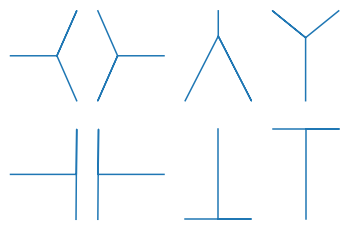

In [232]:
print("These are the building blocks of trees:")
def Bplt(a,b):
    return plt.plot([a[0][0],a[1][0],b[0][0][0],b[0][1][0],b[1][0][0],b[1][1][0]],
                    [a[0][1],a[1][1],b[0][0][1],b[0][1][1],b[1][0][1],b[1][1][1]]),plt.axis('off')

plt.subplot(241)
a = [[-6.0, 0.0],[0, 0]];b = BR(a[0],a[1], 3, 45)
Bplt(a,b)

plt.subplot(242)
a = [[0, 0], [-6.0, 0.0]];b = BR(a[0],a[1], 3, 45)
Bplt(a,b)

plt.subplot(243)
a = [[0, 1],[0, 0]];b = BR(a[0],a[1], 3, 45)
Bplt(a,b)

plt.subplot(244)
a = [[-6.0, -6],[-6.0, -0.0]];b = BR(a[0],a[1], 3, 45)
Bplt(a,b)

plt.subplot(245)
a = [[-6.0, 0.0],[0, 0]];b = BR(a[0],a[1], 3, 90)
Bplt(a,b)

plt.subplot(246)
a = [[0,0], [-6, 0]];b = BR(a[0],a[1], 3, 90)
Bplt(a,b)

plt.subplot(247)
a = [[0,0], [0, -1]];b = BR(a[0],a[1], 3, 90)
Bplt(a,b)

plt.subplot(248)
a = [[0,-1], [0, 0]];b = BR(a[0],a[1], 3, 90)
Bplt(a,b)

plt.show()

### Phylogenetic Tree

#### Points

Finding out the location of different nodes in the tree

In [180]:
p   = []
lbl = []
def Points (NWF, v0, P,LBL):
    global lbl,nwf,p
    p = P
    lbl = LBL
    nwf = NWF
    lst = []
    lst.append(v0)
    if type(nwf[0][0])==str and type(nwf[1][0])==str:
        lst.append(BR(v0[0], v0[1], nwf[0][1], 45)[0])
        vv  = BR(v0[0], v0[1], nwf[0][1], 45)[0]
        vv.append([nwf[0][0],nwf[0][1]])
        lbl.append(vv)
        lst.append(BR(v0[0], v0[1], nwf[1][1], 45)[1])
        vv  = BR(v0[0], v0[1], nwf[1][1], 45)[1]
        vv.append([nwf[1][0],nwf[1][1]])
        lbl.append(vv)
        del lst[0]
        p.extend(lst)
        return([p,lbl])
    elif type(nwf[0][0])==str:
        lst.append(BR(v0[0], v0[1], nwf[0][1], 45)[0])
        vv = BR(v0[0], v0[1], nwf[0][1], 45)[0]
        vv.append([nwf[0][0],nwf[0][1]])
        lbl.append(vv)
        lst.append(BR(v0[0], v0[1], 6, 90)[1])
        del lst[0]
        p.extend(lst)
        del nwf[0]
        n =len(nwf)
        while (n<2):
            nwf=nwf[0]
            n = len(nwf)
        return(Points(nwf, lst[-1],p,lbl))
    elif type(nwf[1][0])==str:
        lst.append(BR(v0[0], v0[1], nwf[1][1], 45)[0])
        vv = BR(v0[0], v0[1], nwf[1][1], 45)[0]
        vv.append([nwf[1][0],nwf[1][1]])
        lbl.append(vv)
        lst.append(BR(v0[0], v0[1], 6, 90)[1])
        del lst[0]
        p.extend(lst)
        del nwf[1]
        n =len(nwf)
        while (n<2):
            nwf=nwf[0]
            n = len(nwf)
        return(Points(nwf, lst[-1],p,lbl))
    else:
        lst.append(BR(v0[0], v0[1], 6, 90)[0])
        lst.append(BR(v0[0], v0[1], 6, 90)[1])
        del lst[0]
        p.extend(lst)
        ss = nwf[1]
        Points(nwf[0], BR(v0[0], v0[1], 6, 90)[0],p,lbl)
        return(Points(ss, BR(v0[0], v0[1], 6, 90)[1],p,lbl))

In [181]:
nf1 = [["B",2],["C",3]]
a   = Points(NWF = nf1, v0 = [[0, 1], [0, 0]],P = [], LBL = [])

In [182]:
nf2 = [["D",4],[["B",2],["C",3]]]
b   = Points(NWF = nf2, v0 = [[0, 1], [0, 0]],P = [], LBL = [])

In [183]:
ex1_points = Points(NWF = NF(example1, U1), v0 = [[0, 1], [0, 0]],P = [], LBL = [])

In [184]:
ex2_points = Points(NWF = NF(example2, U2), v0 = [[0, 1], [0, 0]],P = [], LBL = [])

#### Draw

In [199]:
def draw(p):
    for i in p[0]:
        x = [i[0][0],i[1][0]]
        y = [i[0][1],i[1][1]]
        plt.plot(x, y)
        plt.scatter(i[1][0],i[1][1])
    for i in p[1]:
        x = (i[0][0]+i[1][0])/2.0
        y = (i[0][1]+i[1][1])/2.0
        plt.text(i[1][0],i[1][1],'%s'%i[2][0])
        plt.text(x+.1, y+.1, '%d'%(i[2][1]))
    plt.axis('off')
    plt.show()

[['B', 2], ['C', 3]]


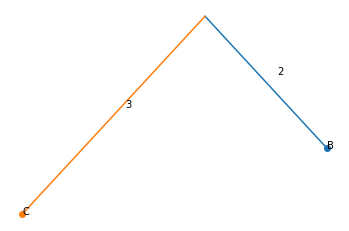

In [200]:
print([["B",2],["C",3]])
draw(a)

[['D', 4], [['B', 2], ['C', 3]]]


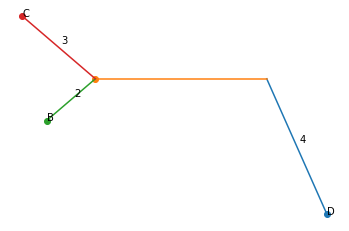

In [201]:
print([["D",4],[["B",2],["C",3]]])
draw(b)

[[['B', 5.0], [['C', 2.0], ['A', 2.0]]], ['D', 3]]


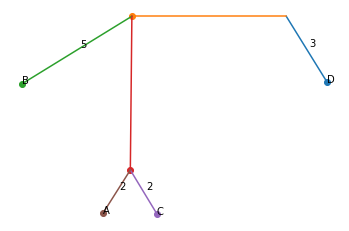

In [202]:
print(NF(example1,U1))
draw(ex1_points)

[[[['E', 2.0], ['D', 3.0]], [['C', 2.0], [['B', 4.0], ['A', 1.0]]]], ['F', 5]]


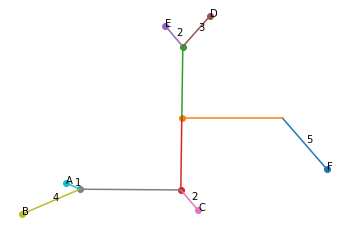

In [203]:
print(NF(example2,U2))
draw(ex2_points)

[[[['E', 2.0], ['D', 3.0]], [['C', 2.0], [['B', 4.0], ['A', 1.0]]]], ['F', 5]]


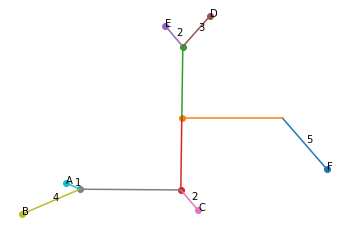

In [204]:
print(NF(example2,U2))
draw(ex2_points)